In [5]:
import os,sys
from dotenv import find_dotenv,load_dotenv
load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [6]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature
import data_reader_writer

# Impact of using gas boilers on te LMP values
In this study we have to investigate the impact of using gas boilers and values of LMP at different generation nodes,
the following code has to be changed accordingly

# Setting up simulation period

We need to set the required inputs to simulate the LOPF such as the start data, end date and simualtion snaphsots

Let us start this for three days period for check

In [3]:
My_network=pypsa.Network()
My_network.import_from_csv_folder('LOPF_data_heat')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data_heat has buses, generators, lines, links, loads, storage_units


 Let us import the heat demand for the gas boiler

In [4]:
heating_EDRP=pd.read_csv('REMA/domestic_EDRP/scaled with normalised profiles/hourly heat demand total_withGasboilers_MW.csv')

In [5]:
heating_EDRP

,Timestamp,Beauly Heat Demand With Gas Boilers,Peterhead Heat Demand With Gas Boilers,Errochty Heat Demand With Gas Boilers,Denny_Bonny/bridge Heat Demand With Gas Boilers,Neilston Heat Demand With Gas Boilers,Strathavenorness Heat Demand With Gas Boilers,Torness Heat Demand With Gas Boilers,Eccles Heat Demand With Gas Boilers,Harker Heat Demand With Gas Boilers,...,Bramford Heat Demand With Gas Boilers,Pelham Heat Demand With Gas Boilers,Sundon_East Heat Demand With Gas Boilers,Melksham Heat Demand With Gas Boilers,Bramley Heat Demand With Gas Boilers,London Heat Demand With Gas Boilers,Kemsley Heat Demand With Gas Boilers,Sellindge Heat Demand With Gas Boilers,Lovedean Heat Demand With Gas Boilers,S_W_Pensiula Heat Demand With Gas Boilers
0,01/01/2022 00:00,426.543621,639.238651,304.142984,1575.059203,2304.102987,758.400432,1393.122169,484.308640,649.700722,...,2397.153686,1811.542764,2948.010518,4691.224612,3022.862106,12932.08959,2714.235549,649.393094,3392.240749,2208.454250
1,01/01/2022 01:00,426.543621,558.473381,304.142984,1575.059203,2304.102987,758.400432,1318.500223,458.366871,564.646641,...,2083.335807,1811.542764,2562.078480,4077.083698,2627.131045,11239.11474,2714.235549,564.379286,2948.153329,1638.326191
2,01/01/2022 02:00,426.543621,563.568445,265.025696,1372.483281,2304.102987,758.400432,1321.986402,459.578815,649.700722,...,2088.844248,1811.542764,2948.010518,4087.863705,2634.077307,11268.83150,2365.144692,565.871532,2948.153329,1638.326191
3,01/01/2022 03:00,447.048132,681.580039,316.736318,1640.276048,2399.506593,789.802733,1579.926444,549.249767,676.602207,...,2496.410145,1811.542764,3070.075736,4087.863705,2627.131045,13467.55523,2826.621089,676.281841,3532.699748,1963.166048
4,01/01/2022 04:00,790.354002,1215.998618,316.736318,1640.276048,2399.506593,789.802733,2821.320525,980.811257,1208.228206,...,4457.912081,1811.542764,5482.323382,8724.124362,5621.522551,24049.40441,5047.579350,676.281841,6308.444513,3505.682614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2022 19:00,5976.716549,2379.444272,3834.755600,19858.972280,38029.289550,12517.422090,9770.511383,3396.646167,12780.514690,...,20419.404010,8435.226853,2948.010518,34348.010080,2634.077307,103152.20710,20750.477140,1987.564530,15795.553290,24033.955210
8756,31/12/2022 20:00,5976.716549,4827.117399,5950.818531,30817.385140,40041.153700,13179.631480,14448.817530,5023.024770,16242.552430,...,2496.410145,8435.226853,16450.703760,34348.010080,2627.131045,103152.20710,2714.235549,5125.324984,15795.553290,9512.884850
8757,31/12/2022 21:00,5976.716549,1690.180268,5950.818531,30817.385140,38029.289550,12517.422090,9770.511383,3396.646167,7492.805899,...,7077.507017,1811.542764,16450.703760,26695.150510,9222.019879,54768.81426,13057.128440,5360.832691,5074.392536,5947.499450
8758,31/12/2022 22:00,5976.716549,8281.492966,5950.818531,30817.385140,34840.774610,11467.915570,29256.720670,10170.883000,12657.114620,...,7077.507017,8435.226853,11390.466380,84972.662730,40217.323020,39452.67204,8280.475028,1735.766607,6308.444513,25834.290030


Text(0, 0.5, 'Heating demand in MWh')

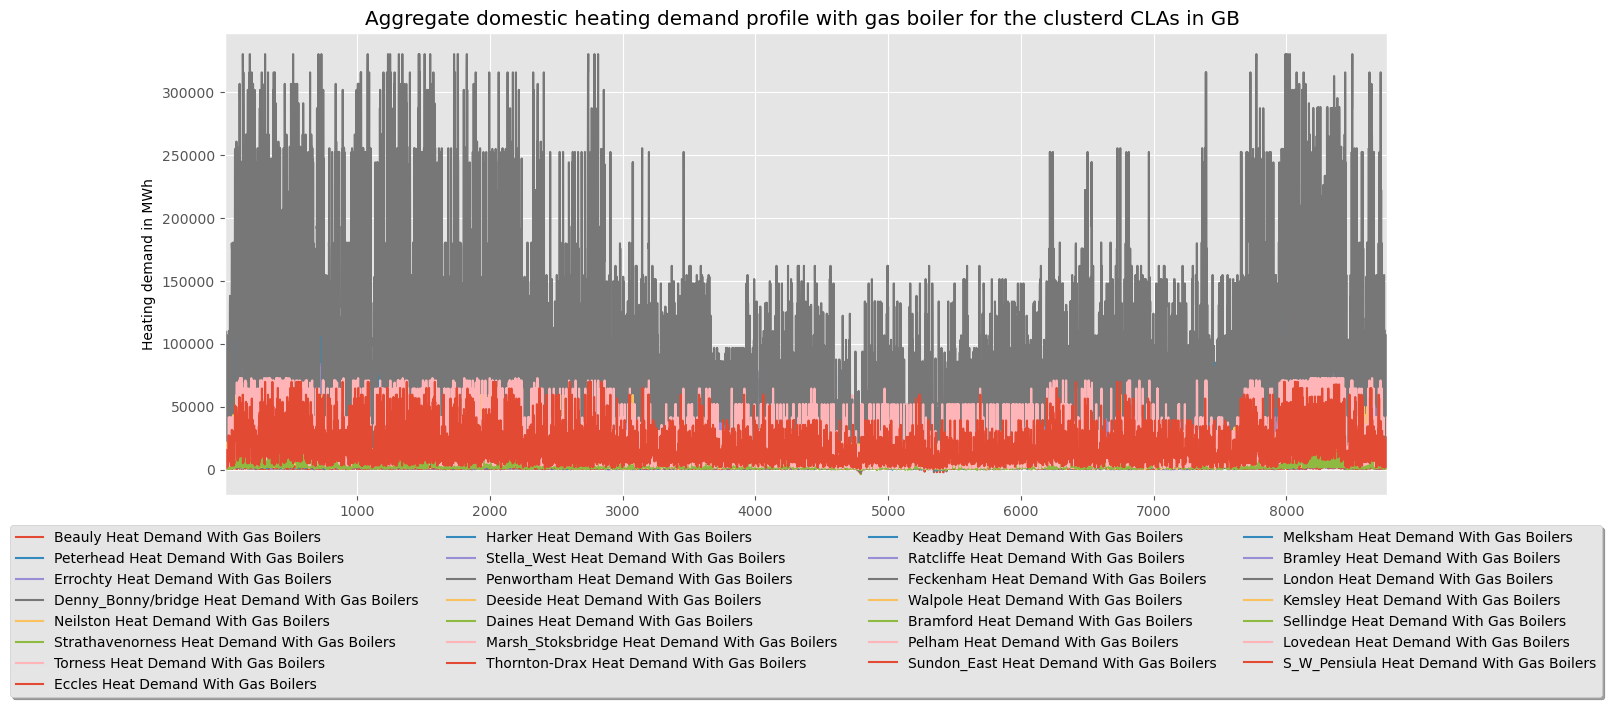

In [6]:
fig, ax= plt.subplots(1,1)
fig.set_size_inches(15,6)

heating_EDRP.plot(ax=ax)

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlim([1, 8760])
plt.title('Aggregate domestic heating demand profile with gas boiler for the clusterd CLAs in GB ')
plt.ylabel('Heating demand in MWh')

In [7]:
heating_EDRP_DHN=pd.read_csv('REMA/domestic_EDRP/DHN/scaled with normalised profiles/hourly heat demand total_withDHN_MW.csv')
heating_EDRP

,Timestamp,Beauly Heat Demand With Gas Boilers,Peterhead Heat Demand With Gas Boilers,Errochty Heat Demand With Gas Boilers,Denny_Bonny/bridge Heat Demand With Gas Boilers,Neilston Heat Demand With Gas Boilers,Strathavenorness Heat Demand With Gas Boilers,Torness Heat Demand With Gas Boilers,Eccles Heat Demand With Gas Boilers,Harker Heat Demand With Gas Boilers,...,Bramford Heat Demand With Gas Boilers,Pelham Heat Demand With Gas Boilers,Sundon_East Heat Demand With Gas Boilers,Melksham Heat Demand With Gas Boilers,Bramley Heat Demand With Gas Boilers,London Heat Demand With Gas Boilers,Kemsley Heat Demand With Gas Boilers,Sellindge Heat Demand With Gas Boilers,Lovedean Heat Demand With Gas Boilers,S_W_Pensiula Heat Demand With Gas Boilers
0,01/01/2022 00:00,426.543621,639.238651,304.142984,1575.059203,2304.102987,758.400432,1393.122169,484.308640,649.700722,...,2397.153686,1811.542764,2948.010518,4691.224612,3022.862106,12932.08959,2714.235549,649.393094,3392.240749,2208.454250
1,01/01/2022 01:00,426.543621,558.473381,304.142984,1575.059203,2304.102987,758.400432,1318.500223,458.366871,564.646641,...,2083.335807,1811.542764,2562.078480,4077.083698,2627.131045,11239.11474,2714.235549,564.379286,2948.153329,1638.326191
2,01/01/2022 02:00,426.543621,563.568445,265.025696,1372.483281,2304.102987,758.400432,1321.986402,459.578815,649.700722,...,2088.844248,1811.542764,2948.010518,4087.863705,2634.077307,11268.83150,2365.144692,565.871532,2948.153329,1638.326191
3,01/01/2022 03:00,447.048132,681.580039,316.736318,1640.276048,2399.506593,789.802733,1579.926444,549.249767,676.602207,...,2496.410145,1811.542764,3070.075736,4087.863705,2627.131045,13467.55523,2826.621089,676.281841,3532.699748,1963.166048
4,01/01/2022 04:00,790.354002,1215.998618,316.736318,1640.276048,2399.506593,789.802733,2821.320525,980.811257,1208.228206,...,4457.912081,1811.542764,5482.323382,8724.124362,5621.522551,24049.40441,5047.579350,676.281841,6308.444513,3505.682614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2022 19:00,5976.716549,2379.444272,3834.755600,19858.972280,38029.289550,12517.422090,9770.511383,3396.646167,12780.514690,...,20419.404010,8435.226853,2948.010518,34348.010080,2634.077307,103152.20710,20750.477140,1987.564530,15795.553290,24033.955210
8756,31/12/2022 20:00,5976.716549,4827.117399,5950.818531,30817.385140,40041.153700,13179.631480,14448.817530,5023.024770,16242.552430,...,2496.410145,8435.226853,16450.703760,34348.010080,2627.131045,103152.20710,2714.235549,5125.324984,15795.553290,9512.884850
8757,31/12/2022 21:00,5976.716549,1690.180268,5950.818531,30817.385140,38029.289550,12517.422090,9770.511383,3396.646167,7492.805899,...,7077.507017,1811.542764,16450.703760,26695.150510,9222.019879,54768.81426,13057.128440,5360.832691,5074.392536,5947.499450
8758,31/12/2022 22:00,5976.716549,8281.492966,5950.818531,30817.385140,34840.774610,11467.915570,29256.720670,10170.883000,12657.114620,...,7077.507017,8435.226853,11390.466380,84972.662730,40217.323020,39452.67204,8280.475028,1735.766607,6308.444513,25834.290030


Text(0, 0.5, 'Heat demand in MWh')

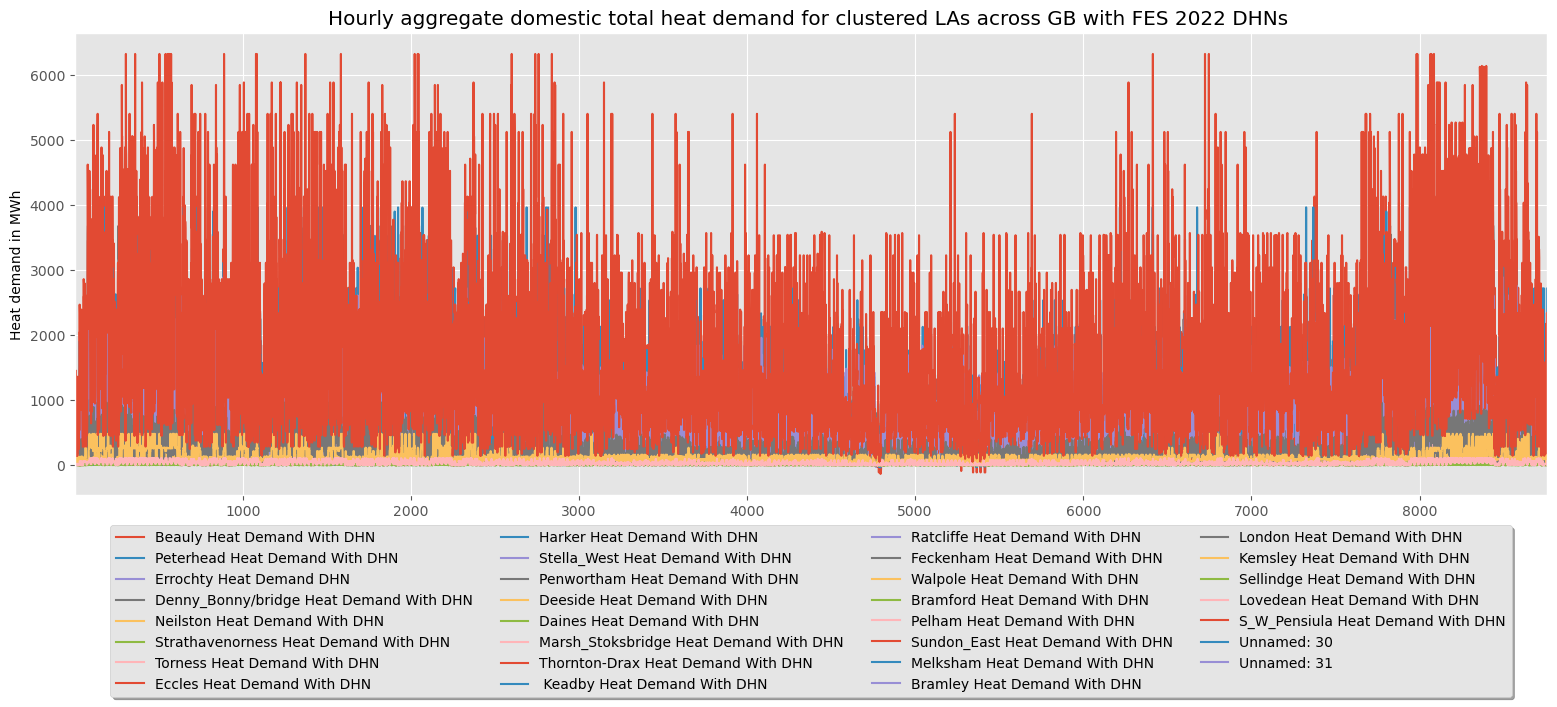

In [8]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(19,6)
heating_EDRP_DHN.plot(ax=ax)
#plt.legend(bbox_to_anchor=(1.0, 1.0))
#plt.legend(loc=(1.0,1.0))
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)
plt.xlim([1, 8760])
plt.title('Hourly aggregate domestic total heat demand for clustered LAs across GB with FES 2022 DHNs ')
plt.ylabel('Heat demand in MWh')

In [9]:
heating_RHPP=pd.read_csv('REMA/domestic_RHPP/scaled with normalised profiles/hourly heat demand total_withHPs_MW.csv')


Text(0, 0.5, 'Heat demand in MWh')

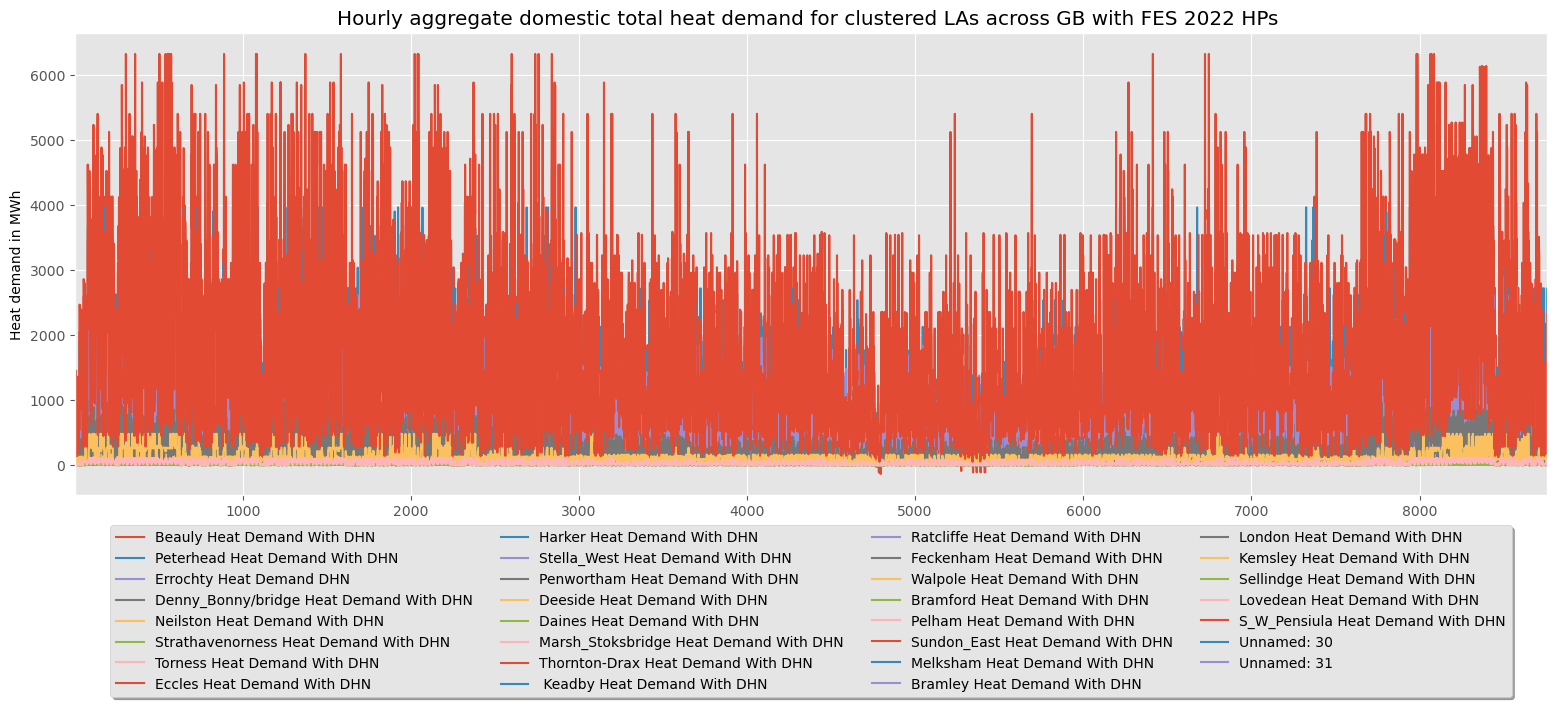

In [10]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(19,6)
heating_EDRP_DHN.plot(ax=ax)
#plt.legend(bbox_to_anchor=(1.0, 1.0))
#plt.legend(loc=(1.0,1.0))
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)
plt.xlim([1, 8760])
plt.title('Hourly aggregate domestic total heat demand for clustered LAs across GB with FES 2022 HPs ')
plt.ylabel('Heat demand in MWh')

In [12]:
# add the heat demand profile with gas boilers
for i in range(29):
    My_network.add(
    'Load',
    'load gas {}'.format(i+1),
    bus='Heat Bus {}'.format(i+1),
        p_set=heating_EDRP.iloc[:,1].values.tolist(),
    )

In [13]:
My_network.loads_t.p_set
My_network.generators

,carrier,p_nom,type,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Drax - coal units,Coal,1980.0,,Thornton/Drax/Eggborough,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Ratcliffe,Coal,2000.0,,Ratcliffe,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Cottam,Coal,2008.0,,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
West Burton,Coal,2012.0,,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Eggborough,Coal,1960.0,,Thornton/Drax/Eggborough,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interconnector Deeside,Interconnector,600.0,Interconnector,Deeside,20.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Interconnector Sellindge,Interconnector,3200.0,Interconnector,Sellindge,20.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Interconnector Neilston,Interconnector,600.0,Interconnector,Neilston,20.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


To approximate n-1 security and allow room for reactive power flows, don't allow any line to be loaded above 70% of thier thermal rating

In [14]:
My_network.lines

,bus0,bus1,r,x,b,s_nom,type,g,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
0,Beauly,Peterhead,0.0122,0.0200,0.0856,525.0,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beauly,Errochty,0.0070,0.1500,0.0520,132.0,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Beauly,Peterhead,0.0122,0.0200,0.2844,525.0,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Beauly,Errochty,0.0070,0.1500,0.0520,132.0,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Peterhead,Denny/Bonnybridge,0.0004,0.0650,0.4454,760.0,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Ireland,Deeside,0.0001,0.0001,0.0000,600.0,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,N. Ireland,Neilston,0.0001,0.0001,0.0000,600.0,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,Belgium,Sellindge,0.0001,0.0001,0.0000,1100.0,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
contingency_factor = 0.7
My_network.lines.s_max_pu[0:99] *= contingency_factor    # we have 105 lines but 6 of them are interconnectors

In [16]:
COPs=pd.read_csv('LOPF_data_heat/hourly COP_HPs.csv')
cop_1=COPs['Beauly COP'].values.tolist()

In [17]:
for i in range(29):
    My_network.add(
        "Generator",
        "boiler {}".format(i+1),
       bus="Heat Bus {}".format(i+1),
       p_nom_extendable=True,
        efficiency=0.94,
        marginal_cost=20.0,
        carrier="gas",
    )
    # all the boilers are assumed as 94% efficient, the other electrical generators are assumed as 100% efficient

In [18]:
My_network.generators.efficiency

Generator
Drax - coal units    1.00
Ratcliffe            1.00
Cottam               1.00
West Burton          1.00
Eggborough           1.00
                     ... 
boiler 25            0.94
boiler 26            0.94
boiler 27            0.94
boiler 28            0.94
boiler 29            0.94
Name: efficiency, Length: 686, dtype: float64

In [19]:
My_network.loads_t.p_set

Load,Beauly_h_load,Peterhead_h_load,Errochty_h_load,Denny/Bonnybridge_h_load,Neilston_h_load,Strathaven_h_load,Torness_h_load,Eccles_h_load,Harker_h_load,Stella West_h_load,...,load gas 20,load gas 21,load gas 22,load gas 23,load gas 24,load gas 25,load gas 26,load gas 27,load gas 28,load gas 29
snapshot,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,10.942715,37.462132,16.490737,120.434624,21.378262,242.394750,43.325102,13.538760,27.152475,144.879046,...,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621
2016-01-01 01:00:00,10.942715,40.159273,16.490737,120.434624,21.378262,242.394750,52.880609,16.524783,30.727461,155.309826,...,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621
2016-01-01 02:00:00,10.942715,44.842039,21.615461,157.861342,21.378262,242.394750,61.249651,19.140044,27.152475,204.818699,...,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621,426.543621
2016-01-01 03:00:00,13.841407,50.200470,24.346659,177.807735,31.562521,357.867698,68.988783,21.558463,40.087475,230.698337,...,447.048132,447.048132,447.048132,447.048132,447.048132,447.048132,447.048132,447.048132,447.048132,447.048132
2016-01-01 04:00:00,16.430302,55.141092,24.346659,177.807735,31.562521,357.867698,74.444288,23.263266,43.257519,155.309826,...,790.354002,790.354002,790.354002,790.354002,790.354002,790.354002,790.354002,790.354002,790.354002,790.354002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,37.373451,100.140302,56.833501,415.064601,83.667726,948.656037,139.833402,43.696860,144.496536,534.421664,...,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549
2016-12-30 20:00:00,37.373451,127.582344,72.288505,527.935094,83.156563,942.860278,127.825250,39.944405,150.381898,580.150823,...,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549
2016-12-30 21:00:00,37.373451,106.071456,72.288505,527.935094,83.667726,948.656037,139.833402,43.696860,100.575179,506.553368,...,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549,5976.716549


In [20]:
My_network

PyPSA Network
Components:
 - Bus: 64
 - Generator: 686
 - Line: 105
 - Link: 29
 - Load: 93
 - StorageUnit: 4
Snapshots: 8760

In [23]:
My_network.consistency_check()

In [25]:
 My_network.lopf(My_network.snapshots,solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 84.16s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Read LP format model from file C:\Users\salene\AppData\Local\Temp\pypsa-problem-12mj2ymz.lp
Reading time = 43.53 seconds
obj: 27811628 rows, 7288350 columns, 49035732 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27811628 rows, 7288350 columns and 49035732 nonzeros
Model fingerprint: 0x1ebc99e4
Coefficient statistics:
  Matrix range     [6e-05, 3e+00]
  Objective range  [1e+00, 9e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-06, 1e+04]
Presolve removed 26506406 rows and 239101 columns (presolve time = 5s) ...
Presolve removed 27246874 rows and 5690180 columns (presolve time = 10s) ...
Presolve removed 27316999 rows and 5698843 columns
Presolve time: 15.30s
Presolved: 494629 rows, 1659579 columns, 3056274 nonzeros

Concurrent LP optimizer: dual simplex and 

INFO:pypsa.linopf:Optimization successful. Objective value: 1.85e+10


('ok', 'optimal')

In [38]:
mismatch = My_network.loads_t.p_set.sum(axis=1) - My_network.generators_t.p.sum(axis=1)

# include the storage charge and discharge

# Estimate the Curtailed VRE Production & Investigate the Impact of Adding a Storage Unit


In [46]:
# calculating the curtailment time series
#https://groups.google.com/g/pypsa/c/0ZhL_EWcS9U/m/TX0fbhdVCgAJ
#curt_t = (My_network.generators_t.p_max_pu * My_network.generators.p_nom_opt - My_network.generators_t.p).clip(lower=0)
#curt_t.groupby(My_network.generators.carriers, axis=1).sum()  
My_network.generators_t

Generator,Drax - coal units,Ratcliffe,Cottam,West Burton,Eggborough,Rugeley,Aberthaw B,Fiddler`s Ferry,Dungeness B,Hartlepool,...,boiler 20,boiler 21,boiler 22,boiler 23,boiler 24,boiler 25,boiler 26,boiler 27,boiler 28,boiler 29
snapshot,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,766.5,861.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,766.5,861.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,766.5,861.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,766.5,861.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,766.5,861.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,1980.0,2000.0,2008.0,2012.0,1960.0,1006.0,1586.0,1961.0,766.5,861.4,...,3968.662373,6073.363931,0.000000,6406.083599,4571.339350,0.000000,0.0,0.0,0.000000,6256.729745
2016-12-30 20:00:00,1980.0,2000.0,2008.0,2012.0,1960.0,1006.0,1586.0,1961.0,766.5,861.4,...,0.000000,838.476445,6237.593071,6406.083599,5666.330665,1626.897488,0.0,0.0,0.000000,6144.845571
2016-12-30 21:00:00,1980.0,2000.0,2008.0,2012.0,1960.0,1006.0,1586.0,1961.0,766.5,861.4,...,0.000000,0.000000,6237.593071,6368.580460,5522.277261,916.009645,0.0,0.0,0.000000,6201.714370


In [48]:
My_network.storage_units_t.p_dispatch

StorageUnit,Dinorwig,Ffestiniog,Cruachan,Foyers
snapshot,,,,
2016-01-01 00:00:00,0.000000,0.0,11.392234,0.0
2016-01-01 01:00:00,0.000000,0.0,0.000000,0.0
2016-01-01 02:00:00,0.000000,0.0,0.000000,0.0
2016-01-01 03:00:00,0.000000,0.0,0.000000,0.0
2016-01-01 04:00:00,0.000000,0.0,0.000000,0.0
...,...,...,...,...
2016-12-30 19:00:00,1566.173053,0.0,284.941531,300.0
2016-12-30 20:00:00,0.000000,0.0,0.000000,0.0
2016-12-30 21:00:00,0.000000,0.0,0.000000,300.0


In [49]:
My_network.generators.p_nom_opt     # MW this are the nominal capcity of generators specified

Generator
Drax - coal units     1980.000000
Ratcliffe             2000.000000
Cottam                2008.000000
West Burton           2012.000000
Eggborough            1960.000000
                         ...     
boiler 25            11799.768786
boiler 26             8494.945194
boiler 27             7878.960210
boiler 28             8648.171433
boiler 29             8319.572115
Name: p_nom_opt, Length: 686, dtype: float64

In [50]:
df_network = pd.read_csv('LOPF_data_heat/buses.csv')
lon = df_network.iloc[28:]['x'].values
lat = df_network.iloc[28:]['y'].values
coordinates = np.zeros(shape=(len(lon), 2))
for i in range(len(lon)):
    coordinates[i][0] = lon[i]
    coordinates[i][1] = lat[i]

df_lines = pd.read_csv('LOPF_data_heat/lines.csv', index_col=0)
df_buses = pd.read_csv('LOPF_data_heat/buses.csv', index_col=0)

# Extract the coordinates of buses and lines for the sake of plotting
line_coordinates = []
for i in range(len(df_lines['bus0'].values)):

    bus0 = df_lines['bus0'].iloc[i]
    bus1 = df_lines['bus1'].iloc[i]
    bus0_coord = [df_buses.iloc[29:]['x'][bus0], df_buses.iloc[29:]['y'][bus0]]
    bus1_coord = [df_buses.iloc[29:]['x'][bus1], df_buses.iloc[29:]['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord])
    

In [51]:
df_buses.iloc[28:].index
#df_lines['bus0'].iloc[98]

Index(['Heat Bus 29', 'Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge',
       'Neilston', 'Strathaven', 'Torness', 'Eccles', 'Harker', 'Stella West',
       'Penwortham', 'Deeside', 'Daines', 'Th. Marsh/Stocksbridge',
       'Thornton/Drax/Eggborough', 'Keadby', 'Ratcliffe', 'Feckenham',
       'Walpole', 'Bramford', 'Pelham', 'Sundon/East Claydon', 'Melksham',
       'Bramley', 'London', 'Kemsley', 'Sellindge', 'Lovedean', 'S.W.Penisula',
       'Netherlands', 'Belgium', 'France1', 'France2', 'Ireland',
       'N. Ireland'],
      dtype='object', name='name')

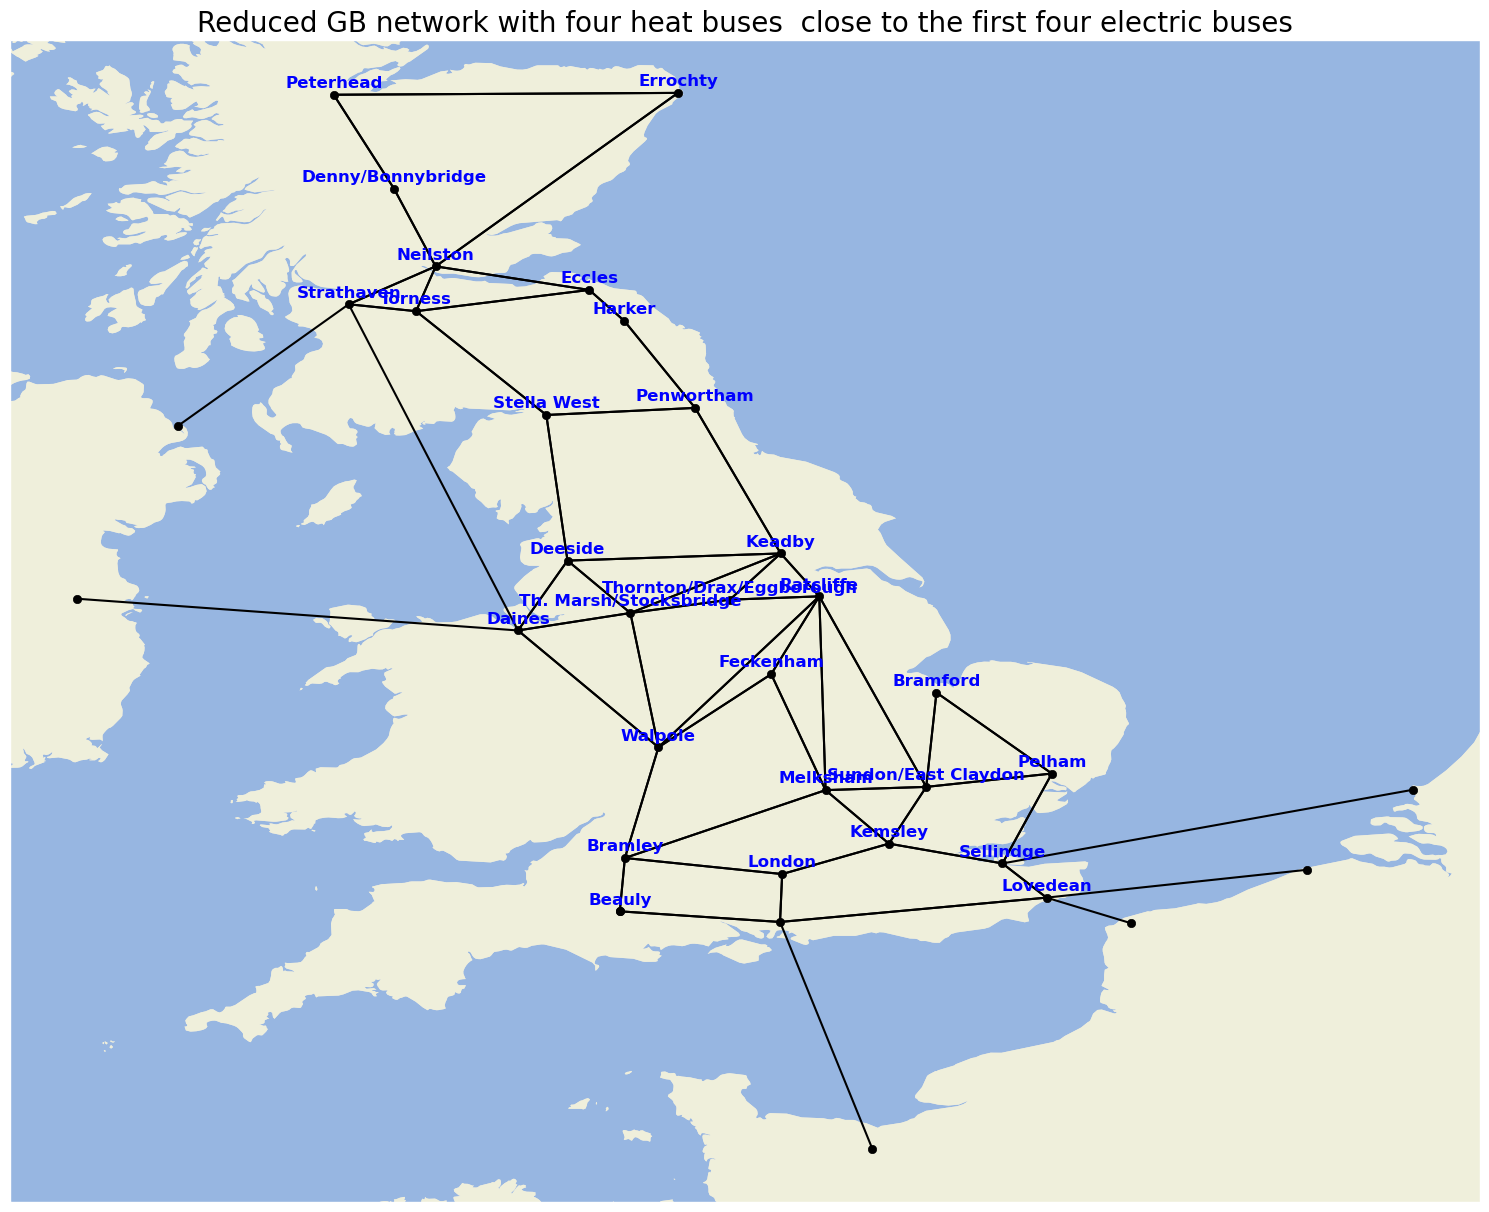

In [52]:
# then using the above information, plot the network
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

#extent = [-8.09782, 2.40511, 60, 49.5]
#ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='black')

# display the rconnection for the heat buses and also the electric bus Beally connection with the heat bus 3 in the figure
#for h in range(4):
 #   ax.plot([df_buses['x'].iloc[h],df_buses['x'].iloc[h+1]],
 #           [df_buses['y'].iloc[h],df_buses['y'].iloc[h+1]],
 #          color='red')
    
# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')

#ax.scatter(lon[0:4], lat[0:4], c='red', edgecolors='red')
#ax.scatter(lon[4:], lat[4:], c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses.iloc[29:57].index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='blue',
                fontsize='large')

ax.set_title('Reduced GB network with four heat buses  close to the first four electric buses', fontsize=20)
fig.tight_layout()

In [53]:
My_network.links_t.p0

Link,heat pump Beauly,heat pump Peterhead,heat pump Errochty,heat pump Denny/Bonnybridge,heat pump Neilston,heat pump Strathaven,heat pump Torness,heat pump Eccles,heat pump Harker,heat pump Stella West,...,heat pump Bramford,heat pump Pelham,heat pump Sundon/East Claydon,heat pump Melksham,heat pump Bramley,heat pump London,heat pump Kemsley,heat pump Sellindge,heat pump Lovedean,heat pump S.W.Penisula
snapshot,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,182.666529,183.075854,166.241786,205.245120,168.075754,251.008770,178.115513,166.824254,168.534954,217.353620,...,199.725161,173.926193,208.316277,209.951021,201.920433,406.198869,218.513004,170.584081,222.431715,184.453601
2016-01-01 01:00:00,182.666529,183.164401,166.241786,205.245120,168.075754,251.008770,180.200801,166.535765,170.147379,220.566129,...,202.892839,173.926193,213.710867,219.237741,208.738468,439.620447,218.513004,174.440749,231.764211,188.219439
2016-01-01 02:00:00,182.666529,183.704466,165.372355,215.647588,168.075754,251.008770,183.968800,168.087371,168.534954,238.926138,...,209.576385,173.926193,208.316277,230.556342,217.467331,484.970721,239.323724,175.796257,231.764211,188.219439
2016-01-01 03:00:00,188.889155,192.769375,171.105187,226.807937,176.609097,297.016911,193.308453,175.540960,177.108019,256.043245,...,221.091364,181.368847,242.882063,238.173173,216.230069,535.635649,258.193695,185.996269,262.724876,206.974666
2016-01-01 04:00:00,313.314293,323.263274,295.717118,351.419869,303.290230,423.698044,322.325118,303.249075,305.072835,358.477569,...,350.305572,305.980778,376.922877,380.598870,364.429399,693.936389,392.982747,312.888109,399.902163,334.211221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,1823.559277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,821.731320,0.000000,2246.198755,0.000000,575.686389,2574.553046,2254.513871,2164.691996,2286.900266,0.000000
2016-12-30 20:00:00,1632.613904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2248.095916,1931.692799,0.000000,0.000000,166.298666,1977.197625,2239.697610,2162.025091,2286.900266,0.000000
2016-12-30 21:00:00,1963.897040,0.000000,0.000000,0.000000,244.922842,0.000000,0.000000,0.000000,0.000000,0.000000,...,2222.087381,2188.508018,0.000000,0.000000,229.422994,2290.564879,2268.529473,2212.089725,2347.737134,0.000000


In [54]:
My_network.links_t.efficiency

Link,heat pump Beauly,heat pump Peterhead,heat pump Errochty,heat pump Denny/Bonnybridge,heat pump Neilston,heat pump Strathaven,heat pump Torness,heat pump Eccles,heat pump Harker,heat pump Stella West,...,heat pump Bramford,heat pump Pelham,heat pump Sundon/East Claydon,heat pump Melksham,heat pump Bramley,heat pump London,heat pump Kemsley,heat pump Sellindge,heat pump Lovedean,heat pump S.W.Penisula
snapshot,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2.395,2.5345,2.665,2.665,2.665,2.665,2.6380,2.6380,2.6920,2.6290,...,2.6650,2.755,2.7235,2.7370,2.7460,2.7010,2.7460,2.7235,2.7100,2.7865
2016-01-01 01:00:00,2.395,2.5480,2.665,2.665,2.665,2.665,2.6605,2.6605,2.6875,2.6380,...,2.6920,2.755,2.7415,2.7100,2.7370,2.6965,2.7460,2.6920,2.7010,2.7640
2016-01-01 02:00:00,2.395,2.5660,2.710,2.710,2.665,2.665,2.6515,2.6515,2.6920,2.6425,...,2.6965,2.755,2.7235,2.6920,2.7325,2.6920,2.7325,2.7100,2.7010,2.7640
2016-01-01 03:00:00,2.440,2.5795,2.755,2.755,2.710,2.710,2.6695,2.6695,2.7505,2.6470,...,2.7280,2.755,2.6965,2.6920,2.7370,2.6830,2.7235,2.7055,2.6920,2.7505
2016-01-01 04:00:00,2.575,2.6155,2.755,2.755,2.710,2.710,2.6830,2.6830,2.7325,2.6380,...,2.7370,2.755,2.6920,2.6965,2.7280,2.6785,2.7145,2.7055,2.6785,2.7595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,2.215,2.2240,2.350,2.350,2.305,2.305,2.3140,2.3140,2.4400,2.3905,...,2.7145,2.710,2.7235,2.6515,2.7325,2.7235,2.7595,2.7820,2.7550,2.7055
2016-12-30 20:00:00,2.215,2.2330,2.305,2.305,2.350,2.350,2.3095,2.3095,2.4265,2.3860,...,2.7280,2.710,2.7145,2.6515,2.7370,2.7235,2.7460,2.7910,2.7550,2.6965
2016-12-30 21:00:00,2.215,2.2420,2.305,2.305,2.305,2.305,2.3140,2.3140,2.4310,2.3995,...,2.7460,2.755,2.7145,2.6380,2.7010,2.7145,2.7415,2.7280,2.7055,2.6830


In [55]:
My_network.links_t.p1

Link,heat pump Beauly,heat pump Peterhead,heat pump Errochty,heat pump Denny/Bonnybridge,heat pump Neilston,heat pump Strathaven,heat pump Torness,heat pump Eccles,heat pump Harker,heat pump Stella West,...,heat pump Bramford,heat pump Pelham,heat pump Sundon/East Claydon,heat pump Melksham,heat pump Bramley,heat pump London,heat pump Kemsley,heat pump Sellindge,heat pump Lovedean,heat pump S.W.Penisula
snapshot,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,-437.486336,-464.005753,-443.034359,-546.978245,-447.921884,-668.938371,-469.868724,-440.082382,-453.696096,-571.422668,...,-532.267554,-479.166663,-567.349380,-574.635944,-554.473508,-1097.143144,-600.036710,-464.585744,-602.789948,-513.979958
2016-01-01 01:00:00,-437.486336,-466.702894,-443.034359,-546.978245,-447.921884,-668.938371,-479.424231,-443.068404,-457.271082,-581.853447,...,-546.187523,-479.166663,-585.888341,-594.134278,-571.317188,-1185.436536,-600.036710,-469.594497,-625.995133,-520.238529
2016-01-01 02:00:00,-437.486336,-471.385661,-448.159082,-584.404963,-447.921884,-668.938371,-487.793273,-445.683665,-453.696096,-631.362320,...,-565.122723,-479.166663,-567.349380,-620.657672,-594.229482,-1305.541181,-653.952076,-476.407857,-625.995133,-520.238529
2016-01-01 03:00:00,-460.889538,-497.248602,-471.394790,-624.855867,-478.610653,-804.915829,-516.036915,-468.606594,-487.135607,-677.746469,...,-603.137241,-499.671173,-654.931482,-641.162182,-591.821698,-1437.110447,-703.190528,-503.212907,-707.255365,-569.283820
2016-01-01 04:00:00,-806.784304,-845.495094,-814.700661,-968.161738,-821.916524,-1148.221700,-864.798291,-813.617269,-833.611521,-945.663828,...,-958.786350,-842.977044,-1014.676385,-1026.284853,-994.163400,-1858.708617,-1066.751666,-846.518778,-1071.137943,-922.255863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,-4039.183798,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-2230.589669,-0.000000,-6117.522308,-0.000000,-1573.063059,-7011.795220,-6221.331028,-6022.173133,-6300.410233,-0.000000
2016-12-30 20:00:00,-3616.239798,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-6132.805658,-5234.887486,-0.000000,-0.000000,-455.159450,-5384.897732,-6150.209637,-6034.212029,-6300.410233,-0.000000
2016-12-30 21:00:00,-4350.031944,-0.000000,-0.000000,-0.000000,-564.547150,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-6101.851947,-6029.339590,-0.000000,-0.000000,-619.671507,-6217.738364,-6219.173549,-6034.580769,-6351.802815,-0.000000


In [ ]:
# add the heat pumps and storage[discharging] to generators dataframe or visulaise them independantly.

In [56]:
p_by_carrier=My_network.generators_t.p.groupby(My_network.generators.carrier,axis=1).sum()
p_by_carrier

carrier,Anaerobic Digestion,Biomass (co-firing),Biomass (dedicated),Coal,EfW Incineration,Interconnector,Landfill Gas,Large Hydro,Natural Gas,Nuclear,Oil,Sewage Sludge Digestion,Shoreline Wave,Small Hydro,Solar Photovoltaics,Wind Offshore,Wind Onshore,gas
snapshot,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,244.2,0.00,0.000,0.0,356.436,2882.499889,743.5,612.898038,16482.756314,6510.14,0.0,44.4,24.0,71.601962,0.0,3350.163489,4240.760135,0.000000
2016-01-01 01:00:00,244.2,0.00,0.000,0.0,356.436,2722.000051,743.5,575.291439,17557.833408,6510.14,0.0,44.4,24.0,67.208562,0.0,2777.624449,3892.858437,0.000000
2016-01-01 02:00:00,244.2,0.00,0.000,0.0,356.436,2719.500032,743.5,574.843740,19196.645014,6510.14,0.0,44.4,24.0,67.156261,0.0,1814.238046,3387.402432,0.000000
2016-01-01 03:00:00,244.2,0.00,0.000,0.0,356.436,2641.499956,743.5,683.634260,19582.003361,6510.14,0.0,44.4,24.0,79.865738,0.0,860.112342,2721.478336,0.000000
2016-01-01 04:00:00,244.2,0.00,0.000,0.0,356.436,2630.000016,743.5,847.939287,23328.829278,6510.14,0.0,44.4,24.0,99.060715,0.0,525.235358,2367.560762,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,244.2,509.54,1048.645,14513.0,356.436,1862.500033,743.5,958.968296,29862.300000,6510.14,0.0,44.4,24.0,112.031706,0.0,2197.461750,5408.172069,122943.622111
2016-12-30 20:00:00,244.2,509.54,1048.645,14513.0,356.436,1009.500030,743.5,860.474818,29862.300000,6510.14,0.0,44.4,24.0,100.525181,0.0,2263.032764,5397.570857,127020.531715
2016-12-30 21:00:00,244.2,509.54,1048.645,14513.0,356.436,1063.500048,743.5,842.566914,29862.300000,6510.14,0.0,44.4,24.0,98.433086,0.0,2311.246482,5371.752929,120043.154292


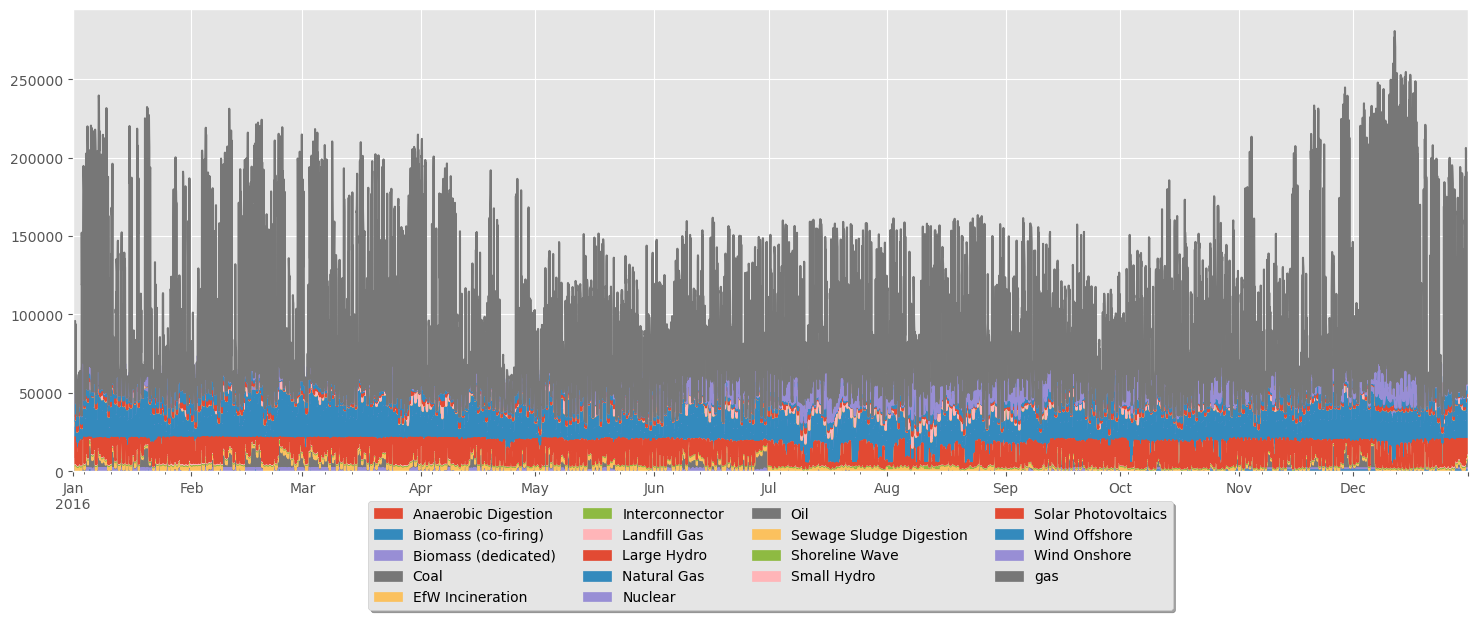

In [58]:
fig, ax= plt.subplots(figsize=(18, 6))

p_by_carrier.plot(ax=ax,kind='area')

# put a legend below current axis
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.05),
         fancybox=True,shadow=True,ncol=4)
#plt.legend(bbox_to_anchor=(1.0, 1.0))

In [62]:
My_network.storage_units_t.p

StorageUnit,Dinorwig,Ffestiniog,Cruachan,Foyers
snapshot,,,,
2016-01-01 00:00:00,0.000000,0.0,11.392234,0.0
2016-01-01 01:00:00,0.000000,0.0,-6.005612,0.0
2016-01-01 02:00:00,0.000000,0.0,0.000000,0.0
2016-01-01 03:00:00,0.000000,0.0,-9.220063,0.0
2016-01-01 04:00:00,0.000000,0.0,0.000000,0.0
...,...,...,...,...
2016-12-30 19:00:00,1566.173053,0.0,284.941531,300.0
2016-12-30 20:00:00,0.000000,0.0,0.000000,0.0
2016-12-30 21:00:00,0.000000,0.0,0.000000,300.0


<Axes: xlabel='snapshot'>

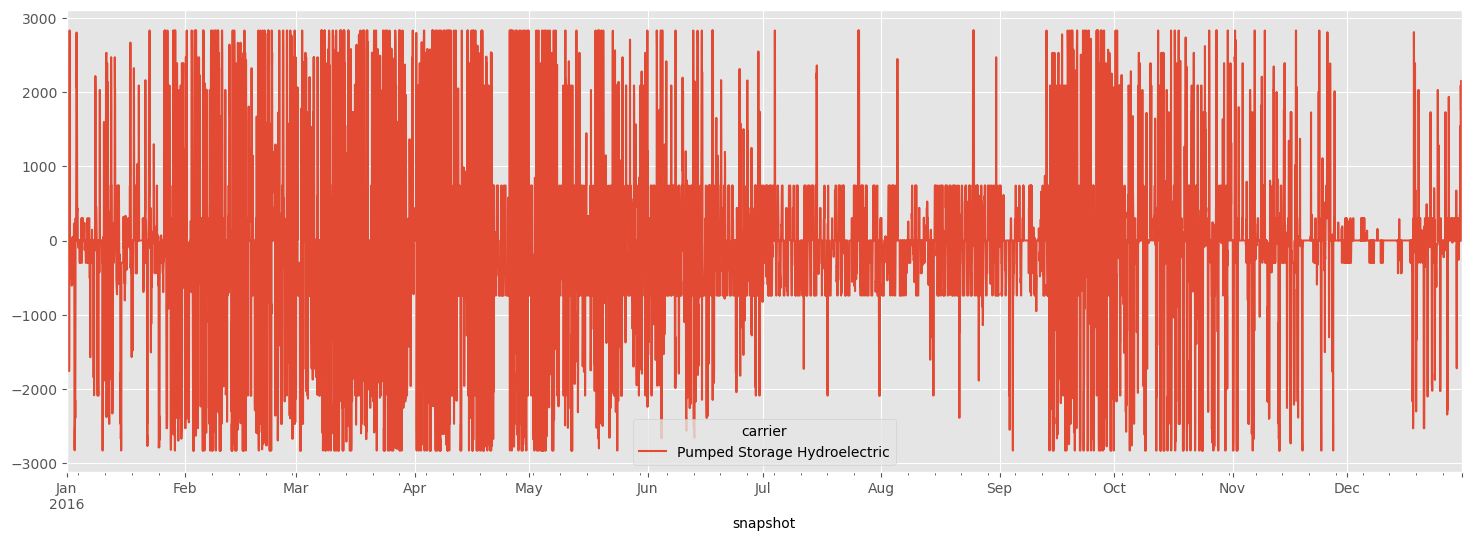

In [61]:
# plot the storage dispatch, charging?discharge? This will plot the total charging and discharging power by the aggregate storage unit per time step.
p_by_storage=My_network.storage_units_t.p.groupby(My_network.storage_units.carrier,axis=1).sum()
p_by_storage
fig, ax= plt.subplots(figsize=(18, 6))
p_by_storage.plot(ax=ax)


In [65]:
# interconnector exports
exports = My_network.loads_t.p
# multiply by negative one to convert it as a generator
# i.e. export is a positive load, but negative generator
exports['Interconnectors Export'] = exports.iloc[:, -6:].sum(axis=1) * -1

interconnector_export = exports[['Interconnectors Export']]


# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'] +
    p_by_carrier['Landfill Gas'] + p_by_carrier['Anaerobic Digestion'] +
    p_by_carrier['Sewage Sludge Digestion'])


# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

carrier,Anaerobic Digestion,Biomass (co-firing),Biomass (dedicated),Coal,EfW Incineration,Interconnectors Import,Landfill Gas,Hydro,Natural Gas,Nuclear,Oil,Sewage Sludge Digestion,Shoreline Wave,Small Hydro,Solar Photovoltaics,Wind Offshore,Wind Onshore,gas,Biomass
snapshot,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,244.2,0.00,0.000,0.0,356.436,2882.499889,743.5,612.898038,16482.756314,6510.14,0.0,44.4,24.0,71.601962,0.0,3350.163489,4240.760135,0.000000,1032.100
2016-01-01 01:00:00,244.2,0.00,0.000,0.0,356.436,2722.000051,743.5,575.291439,17557.833408,6510.14,0.0,44.4,24.0,67.208562,0.0,2777.624449,3892.858437,0.000000,1032.100
2016-01-01 02:00:00,244.2,0.00,0.000,0.0,356.436,2719.500032,743.5,574.843740,19196.645014,6510.14,0.0,44.4,24.0,67.156261,0.0,1814.238046,3387.402432,0.000000,1032.100
2016-01-01 03:00:00,244.2,0.00,0.000,0.0,356.436,2641.499956,743.5,683.634260,19582.003361,6510.14,0.0,44.4,24.0,79.865738,0.0,860.112342,2721.478336,0.000000,1032.100
2016-01-01 04:00:00,244.2,0.00,0.000,0.0,356.436,2630.000016,743.5,847.939287,23328.829278,6510.14,0.0,44.4,24.0,99.060715,0.0,525.235358,2367.560762,0.000000,1032.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,244.2,509.54,1048.645,14513.0,356.436,1862.500033,743.5,958.968296,29862.300000,6510.14,0.0,44.4,24.0,112.031706,0.0,2197.461750,5408.172069,122943.622111,2590.285
2016-12-30 20:00:00,244.2,509.54,1048.645,14513.0,356.436,1009.500030,743.5,860.474818,29862.300000,6510.14,0.0,44.4,24.0,100.525181,0.0,2263.032764,5397.570857,127020.531715,2590.285
2016-12-30 21:00:00,244.2,509.54,1048.645,14513.0,356.436,1063.500048,743.5,842.566914,29862.300000,6510.14,0.0,44.4,24.0,98.433086,0.0,2311.246482,5371.752929,120043.154292,2590.285


In [66]:
# Add the heat pump dispatch to the generation data frame
p_hp=My_network.links_t.p0.sum(axis=1)   # this is the electricty dispatched then, this will be multiplied by cop to get the HP output
p_by_carrier['Heat Pump']=p_hp.values.tolist()

In [67]:
p_by_carrier

carrier,Anaerobic Digestion,Biomass (co-firing),Biomass (dedicated),Coal,EfW Incineration,Interconnectors Import,Landfill Gas,Hydro,Natural Gas,Nuclear,Oil,Sewage Sludge Digestion,Shoreline Wave,Small Hydro,Solar Photovoltaics,Wind Offshore,Wind Onshore,gas,Biomass,Heat Pump
snapshot,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,244.2,0.00,0.000,0.0,356.436,2882.499889,743.5,612.898038,16482.756314,6510.14,0.0,44.4,24.0,71.601962,0.0,3350.163489,4240.760135,0.000000,1032.100,5917.248631
2016-01-01 01:00:00,244.2,0.00,0.000,0.0,356.436,2722.000051,743.5,575.291439,17557.833408,6510.14,0.0,44.4,24.0,67.208562,0.0,2777.624449,3892.858437,0.000000,1032.100,6022.486825
2016-01-01 02:00:00,244.2,0.00,0.000,0.0,356.436,2719.500032,743.5,574.843740,19196.645014,6510.14,0.0,44.4,24.0,67.156261,0.0,1814.238046,3387.402432,0.000000,1032.100,6196.461948
2016-01-01 03:00:00,244.2,0.00,0.000,0.0,356.436,2641.499956,743.5,683.634260,19582.003361,6510.14,0.0,44.4,24.0,79.865738,0.0,860.112342,2721.478336,0.000000,1032.100,6626.549777
2016-01-01 04:00:00,244.2,0.00,0.000,0.0,356.436,2630.000016,743.5,847.939287,23328.829278,6510.14,0.0,44.4,24.0,99.060715,0.0,525.235358,2367.560762,0.000000,1032.100,10411.801246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,244.2,509.54,1048.645,14513.0,356.436,1862.500033,743.5,958.968296,29862.300000,6510.14,0.0,44.4,24.0,112.031706,0.0,2197.461750,5408.172069,122943.622111,2590.285,21943.409754
2016-12-30 20:00:00,244.2,509.54,1048.645,14513.0,356.436,1009.500030,743.5,860.474818,29862.300000,6510.14,0.0,44.4,24.0,100.525181,0.0,2263.032764,5397.570857,127020.531715,2590.285,20503.765114
2016-12-30 21:00:00,244.2,509.54,1048.645,14513.0,356.436,1063.500048,743.5,842.566914,29862.300000,6510.14,0.0,44.4,24.0,98.433086,0.0,2311.246482,5371.752929,120043.154292,2590.285,23397.661179


In [68]:
cols = ["Nuclear", 'Shoreline Wave', 'Biomass',
        'EfW Incineration',
        "Coal", "Oil", "Natural Gas", 'Hydro',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import','Heat Pump'
       ]

Text(0.5, 0, '')

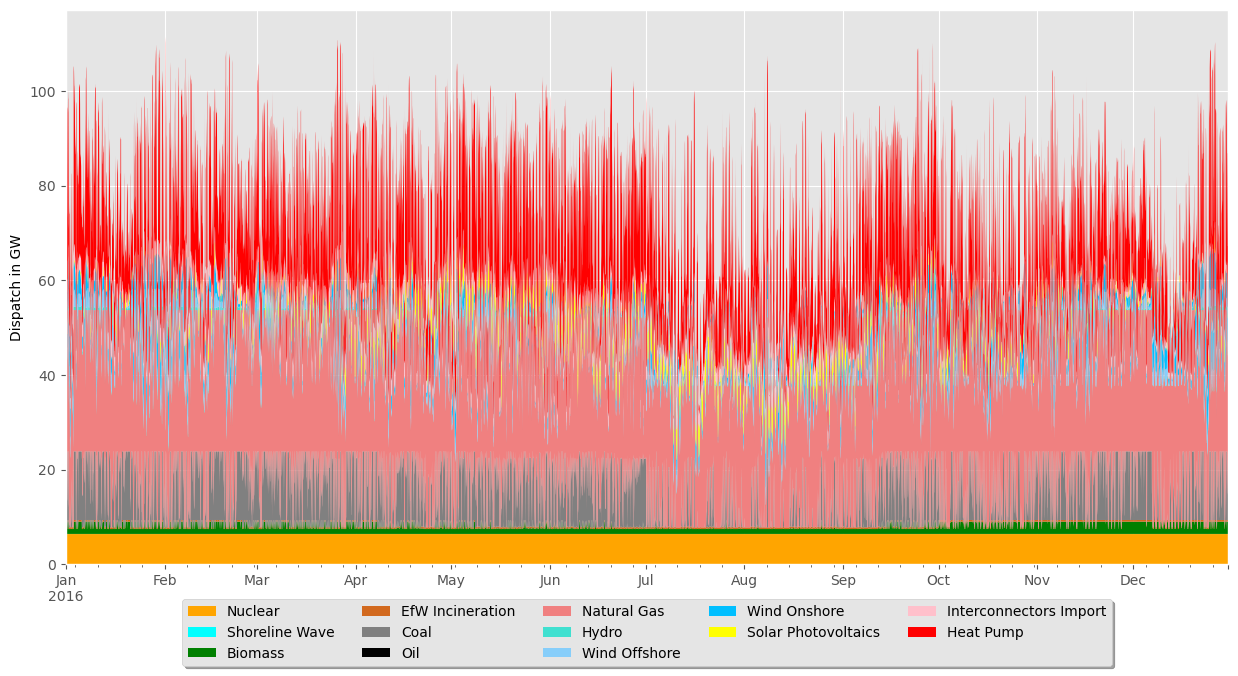

In [69]:
# we have aroudn 20 columns (generation type) but let us visualise the generation for the following types
#cols = ["Nuclear", 'Shoreline Wave', 'Biomass',
        #'EfW Incineration',
        #"Coal", "Oil", "Natural Gas", 'Pumped Storage Hydroelectric', 'Hydro',
        #"Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        #'Interconnectors Import','Heat Pump'
       # ]
p_by_carrier = p_by_carrier[cols]



#p_by_carrier.drop(
    #(p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    #axis=1, inplace=True)

    

colors = {
        "Coal": "grey",
        "Diesel/Gas oil": "black",
        "Diesel/gas Diesel/Gas oil": "black",
        'Oil': 'black',
        'Anaerobic Digestion': 'green',
        'EfW Incineration': 'chocolate',
        'Sewage Sludge Digestion': 'green',
        'Landfill Gas': 'green',
        'Biomass (dedicated)': 'green',
        'Biomass (co-firing)': 'green',
        'Biomass': 'green',
        'Interconnectors Import': 'pink',
        "Sour gas": "lightcoral",
        "Natural Gas": "lightcoral",
        "Nuclear": "orange",
        'Shoreline Wave': 'aqua',
        'Tidal Barrage and Tidal Stream': 'aqua',
        'Hydro': "turquoise",
        "Large Hydro": "turquoise",
        "Small Hydro": "turquoise",
        "Pumped Storage Hydroelectric": "darkturquoise",
        "Wind Offshore": "lightskyblue",
        'Wind Onshore': 'deepskyblue',
        'Solar Photovoltaics': 'yellow',
        'Heat Pump': 'red'
}

    
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,8)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])   
    
    
    # Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])

    
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("Dispatch in GW")
ax.set_xlabel("")

In [71]:
My_network.storage_units_t.state_of_charge

StorageUnit,Dinorwig,Ffestiniog,Cruachan,Foyers
snapshot,,,,
2016-01-01 00:00:00,9099.648,1400.04,7086.669791,6300.0000
2016-01-01 01:00:00,9099.648,1400.04,7091.864646,6300.0000
2016-01-01 02:00:00,9099.648,1400.04,7091.864646,6300.0000
2016-01-01 03:00:00,9099.648,1400.04,7099.840000,6300.0000
2016-01-01 04:00:00,9099.648,1400.04,7099.840000,6300.0000
...,...,...,...,...
2016-12-30 19:00:00,0.000,0.00,0.000000,1040.4621
2016-12-30 20:00:00,0.000,0.00,0.000000,1040.4621
2016-12-30 21:00:00,0.000,0.00,0.000000,693.6414


Text(0.5, 0, '')

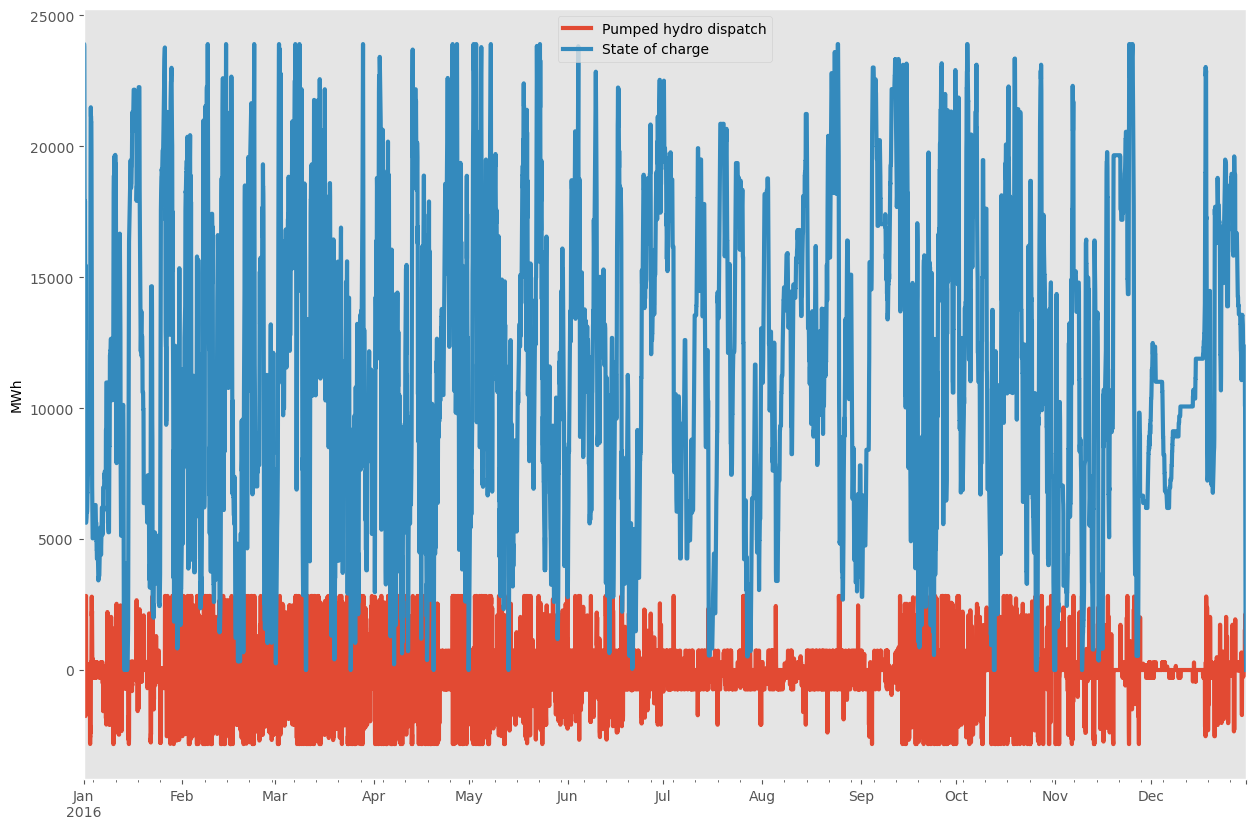

In [72]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = My_network.storage_units_t.p.sum(axis=1)
state_of_charge = My_network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

Plotting line loading
Look at the line loading stats and graph it

In [73]:
My_network.snapshots[139]

Timestamp('2016-01-06 19:00:00')

In [74]:
now = My_network.snapshots[139]

print("With the linear load flow, there is the following per unit loading:")
loading = My_network.lines_t.p0.loc[now] / My_network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    105.000000
mean       0.041031
std        0.307824
min       -0.724167
25%       -0.129739
50%        0.045956
75%        0.261275
max        0.700000
dtype: float64

(<matplotlib.collections.PatchCollection at 0x1db88962820>,
 <matplotlib.collections.LineCollection at 0x1db889a8fd0>)

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


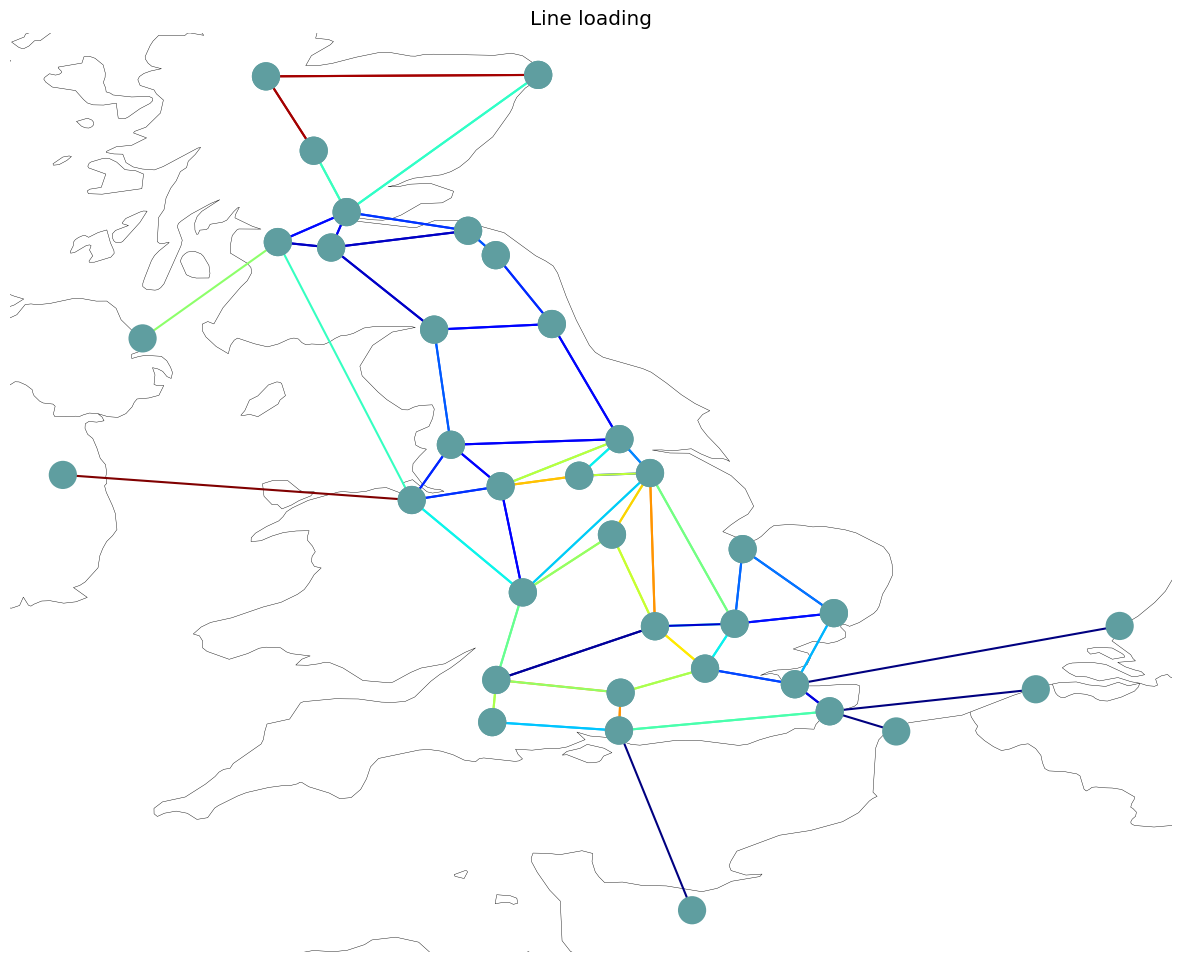

In [75]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)
My_network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

In [96]:
My_network.buses_t.marginal_price

Bus,Heat Bus 1,Heat Bus 2,Heat Bus 3,Heat Bus 4,Heat Bus 5,Heat Bus 6,Heat Bus 7,Heat Bus 8,Heat Bus 9,Heat Bus 10,...,Kemsley,Sellindge,Lovedean,S.W.Penisula,Netherlands,Belgium,France1,France2,Ireland,N. Ireland
snapshot,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,4.472572,6.520541,17.764890,13.292139,13.292139,13.292139,13.428184,13.428184,13.158822,13.474154,...,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550
2016-01-01 01:00:00,14.790626,13.902492,13.292139,13.292139,13.292139,13.292139,13.314621,13.314621,13.180856,13.428184,...,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550
2016-01-01 02:00:00,14.790626,13.804969,13.071421,13.071421,13.292139,13.292139,13.359815,13.359815,13.158822,13.405317,...,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550
2016-01-01 03:00:00,14.517848,13.732720,12.857913,12.857913,13.071421,13.071421,13.269732,13.269732,12.878949,13.382527,...,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550
2016-01-01 04:00:00,13.756718,13.543701,12.857913,12.857913,13.071421,13.071421,13.202963,13.202963,12.963788,13.428184,...,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550,35.423550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,54.326617,54.366926,54.423901,54.230576,54.326617,54.366926,54.366926,54.423901,52.310000,52.077244
2016-12-30 20:00:00,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,54.368309,54.413593,54.477602,54.250876,54.368309,54.413593,54.413593,54.477602,52.148354,52.146171
2016-12-30 21:00:00,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,54.186897,54.138320,54.069657,54.049258,54.186897,54.138320,54.138320,54.069657,52.258844,46.100000


<Axes: xlabel='snapshot'>

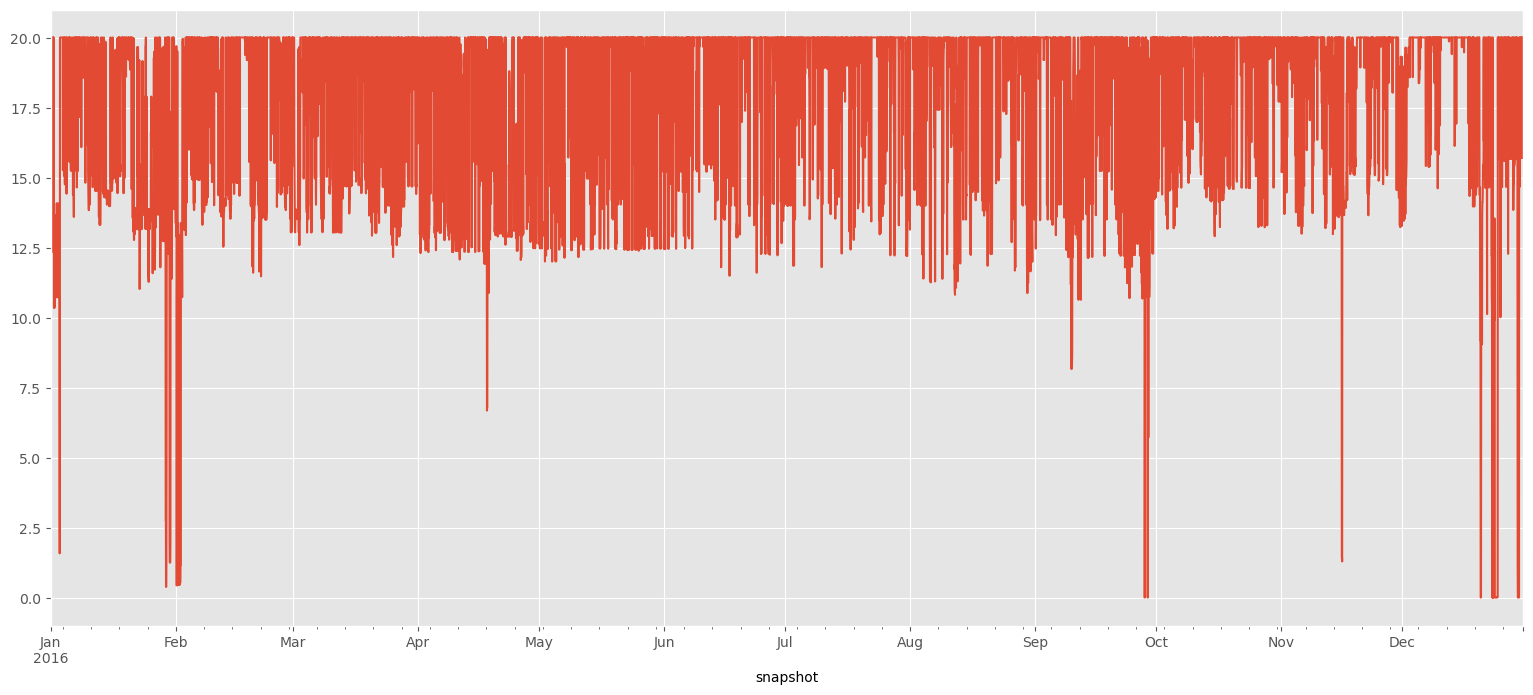

In [93]:
My_network.buses_t.marginal_price
fig,ax=plt.subplots(1,1)
fig.set_size_inches(19,8)
My_network.buses_t.marginal_price['Heat Bus 1'].plot(ax=ax)

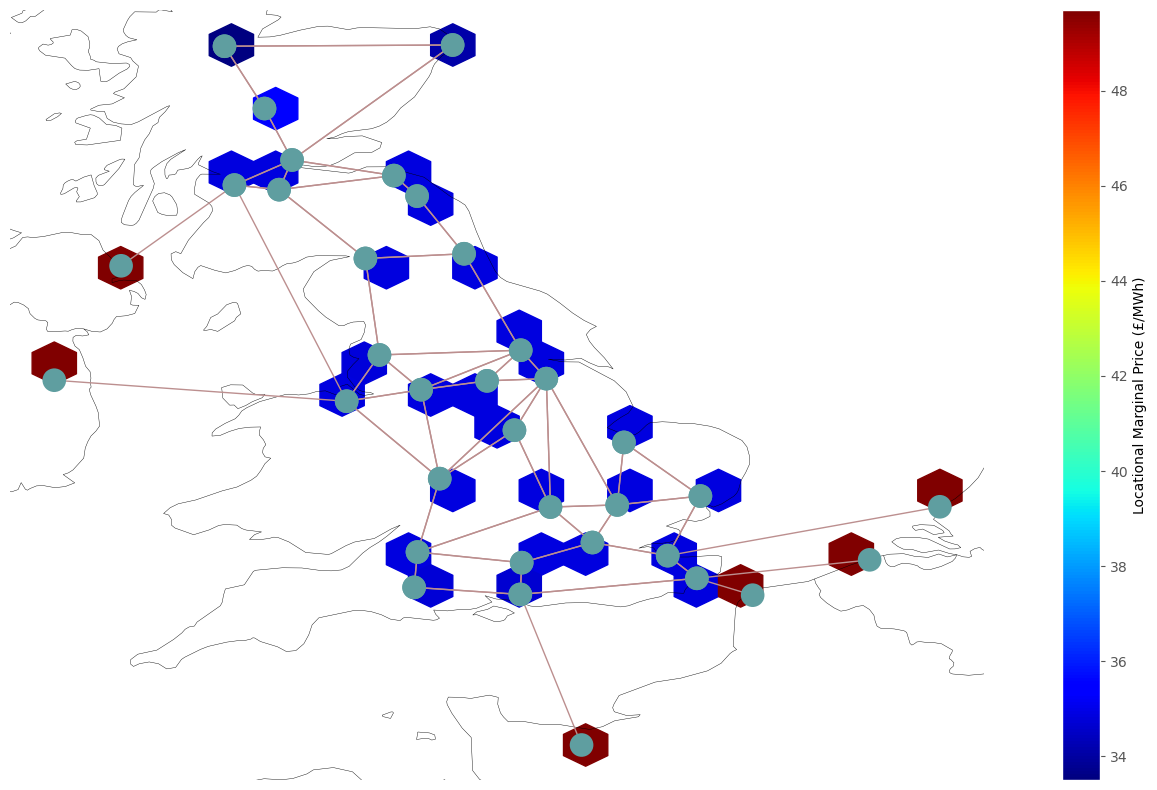

In [76]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

My_network.plot(ax=ax, line_widths=pd.Series(1, My_network.lines.index))
plt.hexbin(My_network.buses.x, My_network.buses.y,
           gridsize=20,
           C=My_network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar
cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')